In [2]:
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pylab as plt
%matplotlib inline
import re
import gc
import glob


In [28]:
data0 = pd.read_csv("parking-tickets-2016/Parking_Tags_Data_2016_1.csv")
data1 = pd.read_csv("parking-tickets-2016/Parking_Tags_Data_2016_2.csv")
data2 = pd.read_csv("parking-tickets-2016/Parking_Tags_Data_2016_3.csv")
data3 = pd.read_csv("parking-tickets-2016/Parking_Tags_Data_2016_4.csv")
data4 = pd.read_csv("parking-tickets-2015/Parking_Tags_Data_2015_1.csv")
data5 = pd.read_csv("parking-tickets-2015/Parking_Tags_Data_2015_2.csv")
data6 = pd.read_csv("parking-tickets-2015/Parking_Tags_Data_2015_3.csv")


In [29]:
new_df = pd.concat([data0, data1, data2, data3, data4, data5, data6])

In [45]:
records = len(data0.index)
record1 = len(data1.index)
record2 = len(data2.index)
record3 = len(data3.index)
record4 = len(data4.index)
record5 = len(data5.index)
record6 = len(data6.index)

print("The number of tickets generated in 2016 is:", records + record1 +record2+ record3)

print("The number of tickets generated in 2015 is:", record5 + record6 + record4)

The number of tickets generated in 2016 is: 2254761
The number of tickets generated in 2015 is: 2168493


In [46]:
records = len(new_df.index)
print(records)

4423254


In [47]:
new_df.head(25)


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***03850,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON
1,***03851,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
2,***98221,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON
3,***85499,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON
4,***03852,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,2.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
5,***16117,20160101,3.0,PARK ON PRIVATE PROPERTY,30,3.0,NaN,621 KING ST W,NaN,NaN,ON
6,***03853,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,3.0,NR,43 GLOUCESTER ST,NaN,NaN,ON
7,***03854,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,39 GLOUCESTER ST,NaN,NaN,ON
8,***03855,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,4.0,NR,39 GLOUCESTER ST,NaN,NaN,ON
9,***03856,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,5.0,NR,31 GLOUCESTER ST,NaN,NaN,ON


In [48]:
new_df.tail(10)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
668483,***26924,20151231,3.0,PARK ON PRIVATE PROPERTY,30,2349.0,AT,155 BONIS AVE,NaN,NaN,ON
668484,***26925,20151231,3.0,PARK ON PRIVATE PROPERTY,30,2349.0,AT,155 BONIS AVE,NaN,NaN,ON
668485,***03845,20151231,29.0,PARK PROHIBITED TIME NO PERMIT,30,2352.0,NR,55 MAITLAND ST,NaN,NaN,ON
668486,***03846,20151231,29.0,PARK PROHIBITED TIME NO PERMIT,30,2353.0,NR,55 MAITLAND ST,NaN,NaN,ON
668487,***03847,20151231,29.0,PARK PROHIBITED TIME NO PERMIT,30,2354.0,NR,37 MAITLAND ST,NaN,NaN,ON
668488,***16116,20151231,3.0,PARK ON PRIVATE PROPERTY,30,2355.0,NaN,621 KING ST W,NaN,NaN,ON
668489,***03848,20151231,29.0,PARK PROHIBITED TIME NO PERMIT,30,2355.0,NR,33 MAITLAND ST,NaN,NaN,ON
668490,***03849,20151231,29.0,PARK PROHIBITED TIME NO PERMIT,30,2359.0,NR,65 GLOUCESTER ST,NaN,NaN,ON
668491,***01046,20151231,347.0,PARK IN A FIRE ROUTE,250,NaN,NaN,2743 VICTORIA PARK AVE,NaN,NaN,ON
668492,***66839,20151231,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,1340 DANFORTH RD,NaN,NaN,ON


In [49]:
new_df.drop_duplicates()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***03850,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON
1,***03851,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
2,***98221,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON
3,***85499,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON
4,***03852,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,2.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...
668488,***16116,20151231,3.0,PARK ON PRIVATE PROPERTY,30,2355.0,NaN,621 KING ST W,NaN,NaN,ON
668489,***03848,20151231,29.0,PARK PROHIBITED TIME NO PERMIT,30,2355.0,NR,33 MAITLAND ST,NaN,NaN,ON
668490,***03849,20151231,29.0,PARK PROHIBITED TIME NO PERMIT,30,2359.0,NR,65 GLOUCESTER ST,NaN,NaN,ON
668491,***01046,20151231,347.0,PARK IN A FIRE ROUTE,250,NaN,NaN,2743 VICTORIA PARK AVE,NaN,NaN,ON


In [10]:
no_of_records = len(new_df.index)
print(no_of_records)

2254761


In [52]:
sum1 = new_df['set_fine_amount'].sum()
print("The total Revenue of year 2015 and 2016 is: CA$",sum1)


The total Revenue of year 2015 and 2016 is: CA$ 209548755


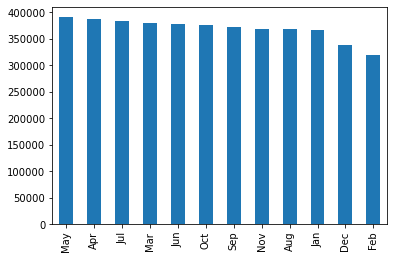

In [53]:
new_df['month_num'] = pd.to_datetime(new_df['date_of_infraction'],format='%Y%m%d').dt.month
new_df['month'] =new_df['month_num'].apply(lambda x: calendar.month_abbr[x])
new_df['month'].value_counts().plot(kind='bar')
plt.show()

In [69]:
new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Group by month and year, and sum the 'sales_amount' for each month-year combination
monthly_revenue = new_df.groupby(new_df['date_of_infraction'].dt.to_period('M'))['set_fine_amount'].sum()

# Print the result
print(monthly_revenue)

date_of_infraction
2015-01     8410675
2015-02     6836030
2015-03     8861035
2015-04     8217365
2015-05     8412845
2015-06     8286675
2015-07     9167795
2015-08     8246625
2015-09     8126525
2015-10     8481970
2015-11     8280865
2015-12     8544365
2016-01     8519150
2016-02     8265715
2016-03     8723315
2016-04    10424730
2016-05    10223945
2016-06     9541990
2016-07     9070130
2016-08     9413430
2016-09     9380745
2016-10     9090150
2016-11     9105375
2016-12     7917310
Freq: M, Name: set_fine_amount, dtype: int64


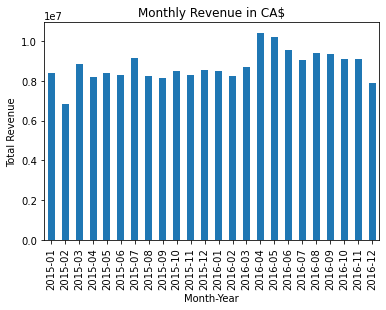

In [70]:
monthly_revenue.plot.bar()

plt.title('Monthly Revenue in CA$')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')

plt.show()

In [72]:
revenue_2016 = monthly_revenue[monthly_revenue.index.year == 2016]
total_revenue_2016 = revenue_2016.sum()
print("Total Revenue of Parking Tickets for 2016 is: CA$", total_revenue_2016)

revenue_2015 = monthly_revenue[monthly_revenue.index.year == 2015]
total_revenue_2015 = revenue_2015.sum()
print("Total Revenue of Parking Tickets for 2015 is: CA$", total_revenue_2015)

Total Revenue of Parking Tickets for 2016 is: CA$ 109675985
Total Revenue of Parking Tickets for 2015 is: CA$ 99872770


In [54]:
#new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Add a new column for the week number
#new_df['week_number'] = new_df['date_of_infraction'].dt.isocalendar().week

# Print the DataFrame to see the results
#print(new_df.head())


new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

new_df['day_of_week'] = new_df['date_of_infraction'].dt.strftime('%A')

print(new_df.head())

  tag_number_masked date_of_infraction  infraction_code  \
0          ***03850         2016-01-01             29.0   
1          ***03851         2016-01-01             29.0   
2          ***98221         2016-01-01             29.0   
3          ***85499         2016-01-01             29.0   
4          ***03852         2016-01-01            406.0   

           infraction_description  set_fine_amount  time_of_infraction  \
0  PARK PROHIBITED TIME NO PERMIT               30                 0.0   
1  PARK PROHIBITED TIME NO PERMIT               30                 1.0   
2  PARK PROHIBITED TIME NO PERMIT               30                 2.0   
3  PARK PROHIBITED TIME NO PERMIT               30                 2.0   
4   PARK-VEH. W/O VALID ONT PLATE               40                 2.0   

  location1         location2 location3 location4 province  month_num month  \
0        NR  49 GLOUCESTER ST       NaN       NaN       ON          1   Jan   
1        NR  45 GLOUCESTER ST       NaN   

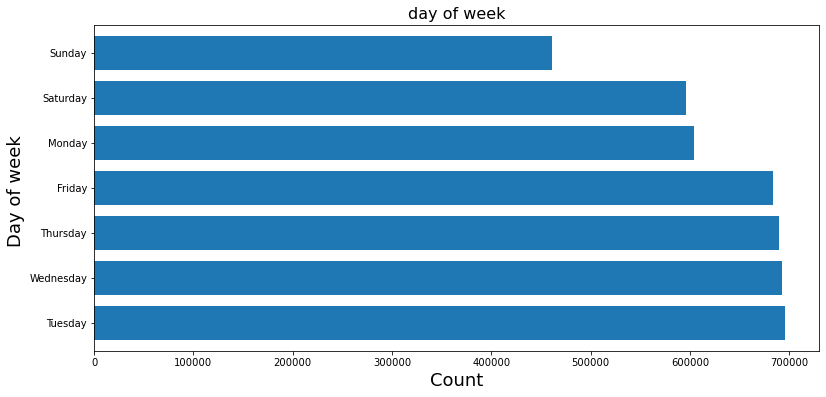

In [55]:
new_df['day_of_week'].value_counts().plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("day of week", fontsize=16)
plt.ylabel("Day of week ", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.show()



The data includes 4,423,254 tickets given out across 731 days. The date range 
spans 730 days from 2015-01-01 to 2016-12-31 .



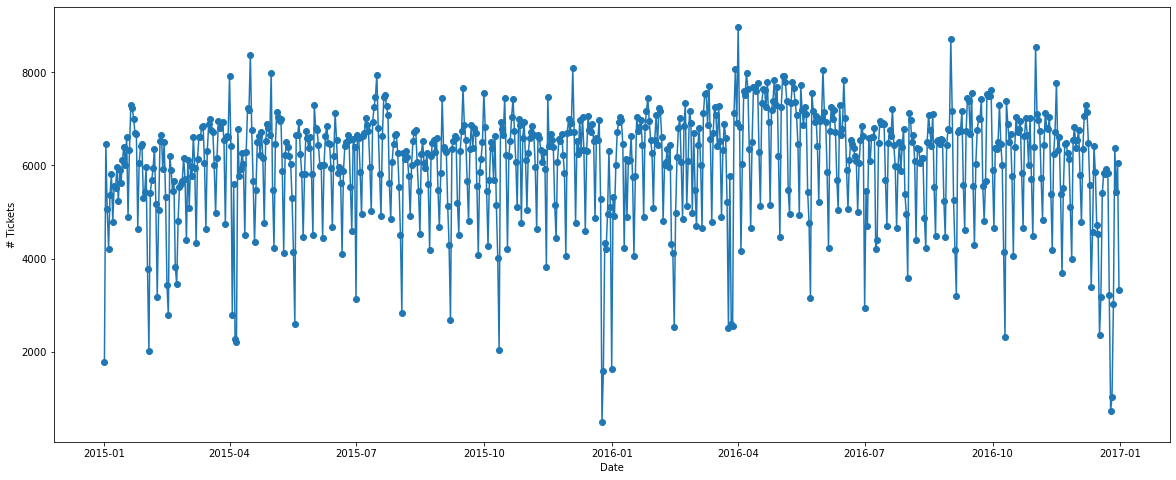

31490

In [56]:
cntIns = new_df.groupby(['date_of_infraction']).size().reset_index(name='count')

x = pd.DataFrame(pd.to_datetime(cntIns['date_of_infraction'],format='%Y%m%d').dt.date)
y = pd.DataFrame(cntIns['count'])

timePlot = pd.concat([x,y], axis=1)

cntObs = timePlot['count'].sum() # count of observations
cntDays = y.shape[0] # count of days

minDate = timePlot['date_of_infraction'].min() # date of first observation
maxDate = timePlot['date_of_infraction'].max() # datet of last observation

dateRange = re.split('\,', str(maxDate - minDate))
dateRange = dateRange[0]

print("\n\nThe data includes", "{:,}".format(cntObs), "tickets given out across", cntDays, "days. The date range \nspans", dateRange, "from", minDate, "to", maxDate, ".\n")

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(xlabel='Date', ylabel='# Tickets')
ax.plot_date(x=timePlot['date_of_infraction'], y=timePlot['count'],ls='-', marker='o')
plt.show()
del x, y, timePlot, fig, ax
gc.collect()

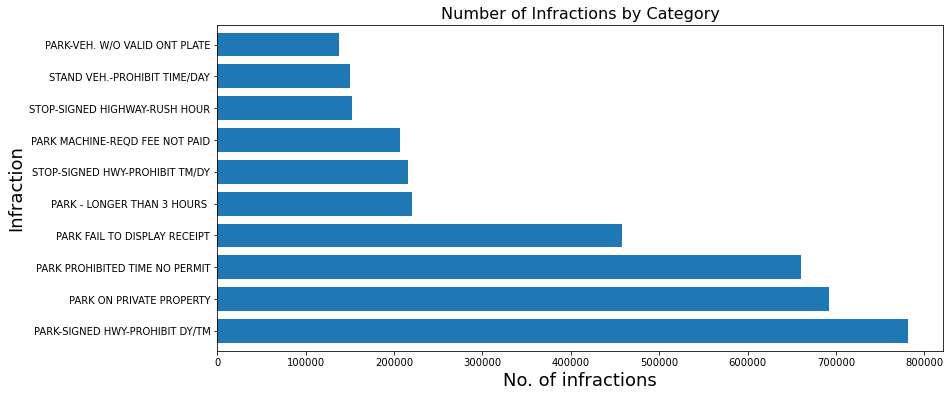

In [57]:
new_df['infraction_description'].value_counts().nlargest(10).plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("Number of Infractions by Category", fontsize=16)
plt.ylabel("Infraction", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [58]:
fine_by_infraction = new_df.groupby('infraction_description')['set_fine_amount'].sum()

In [59]:
print(fine_by_infraction)

infraction_description
ANGLE PARK-METERED SPACE-FRONT     30
ANGLE PARK-TOO FAR FROM METER      30
FAIL ANGLE PARK/STOP AT 45 DEG    990
FAIL PARK/STOP PAR RT HAND LTD      0
FAIL PARK/STP LEFT WHLS PARALL    630
                                 ... 
STOP/STAND/PARK - NO VEND ZONE      0
STOP/STAND/PARK DESIGNATE AREA      0
STOP/STAND/PARK NOT DESIG AREA      0
STOP/STAND/PARK VEND CONT ZONE      0
STOP/STAND/PARK VEND NO PERMIT      0
Name: set_fine_amount, Length: 247, dtype: int64


In [60]:
sorted_data = fine_by_infraction.sort_values(ascending=False)

top_10_infractions = sorted_data.head(10)


print(top_10_infractions)

infraction_description
PARK-SIGNED HWY-PROHIBIT DY/TM    34396000
STOP-SIGNED HIGHWAY-RUSH HOUR     22905600
PARK ON PRIVATE PROPERTY          20765910
PARK PROHIBITED TIME NO PERMIT    19813710
PARK FAIL TO DISPLAY RECEIPT      13736880
STOP-SIGNED HWY-PROHIBIT TM/DY    12928980
STAND VEH.-PROHIBIT TIME/DAY       9021060
PARK IN A FIRE ROUTE               8523000
PARK-WITHIN 3M OF FIRE HYDRANT     6920300
PARK MACHINE-REQD FEE NOT PAID     6190950
Name: set_fine_amount, dtype: int64


In [61]:
pd.crosstab(index=new_df['province'], columns='count').nlargest(10,'count')

col_0,count
province,
ON,4257466
QC,51738
AB,17142
NY,11945
AZ,8694
NS,6839
BC,6759
MI,6165
PQ,4692


In [62]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(10,'count')

count       4422417
unique        24328
top        YONGE ST
freq         122829
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,122829
BLOOR ST W,84239
DANFORTH AVE,78449
QUEEN ST W,71370
QUEEN ST E,58601
KING ST W,53917
DUNDAS ST W,47362
COLLEGE ST,44259
ST CLAIR AVE W,39027


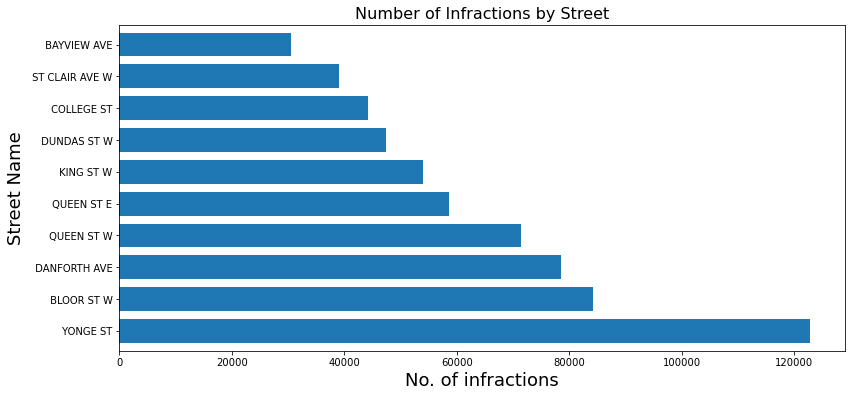

In [63]:
tempticks['location2'].value_counts().nlargest(10).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [64]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(15,'count')

count       4422417
unique        24328
top        YONGE ST
freq         122829
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,122829
BLOOR ST W,84239
DANFORTH AVE,78449
QUEEN ST W,71370
QUEEN ST E,58601
KING ST W,53917
DUNDAS ST W,47362
COLLEGE ST,44259
ST CLAIR AVE W,39027


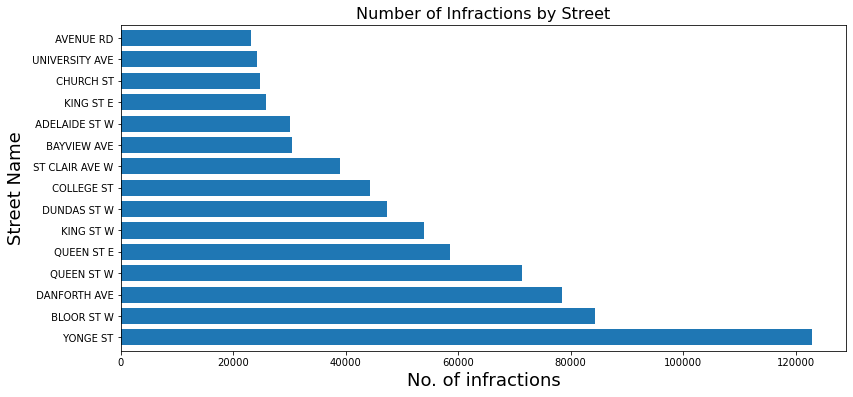

In [65]:
tempticks['location2'].value_counts().nlargest(15).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

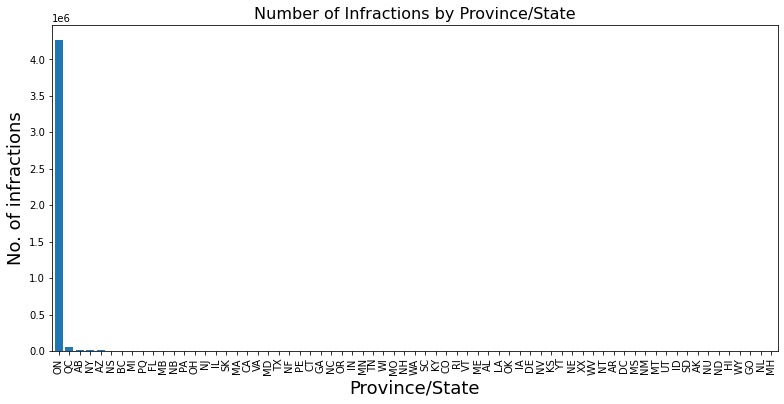

In [66]:
new_df['province'].value_counts().plot(kind='bar',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Province/State", fontsize=16)
plt.xlabel("Province/State", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()

In [67]:
new_df['locality'] = new_df['province'].apply(lambda x: 'Ontario' if x=='ON' else 'Other')
pd.crosstab(index=new_df['locality'], columns='count')

col_0,count
locality,
Ontario,4257466
Other,165788


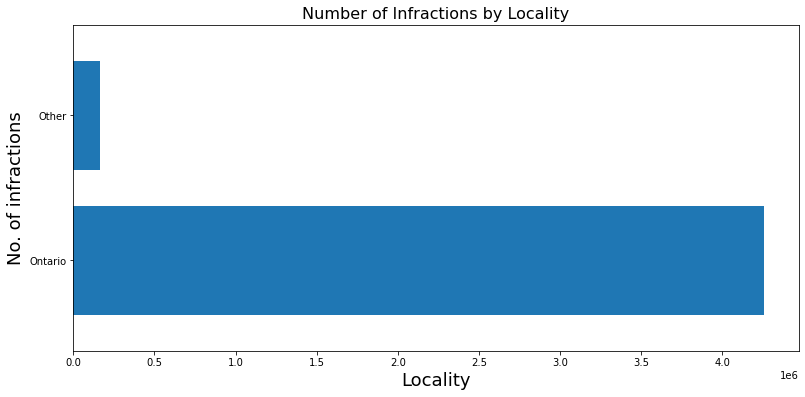

In [68]:
new_df['locality'].value_counts().plot(kind='barh',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Locality", fontsize=16)
plt.xlabel("Locality", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()